# Imports and cleaning

In [1]:
import pandas as pd
from textblob import TextBlob

In [2]:
df = pd.read_csv ('dataclothes.csv')

In [3]:
data = df[['Title', 'Review Text', 'Rating', 'Division Name', 'Department Name']]

In [4]:
data.columns = data.columns.str.replace(' ', '_')

In [5]:
data.columns = data.columns.str.lower()

# Explore

In [6]:
data.head(10)

,title,review_text,rating,division_name,department_name
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate
1,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses
2,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms
4,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops
5,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,General,Dresses
6,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,General Petite,Tops
7,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,General Petite,Tops
8,Flattering,I love this dress. i usually get an xs but it ...,5,General,Dresses
9,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,General,Dresses


In [7]:
data.describe()

,rating
count,23486.000000
mean,4.196032
std,1.110031
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            19676 non-null  object
 1   review_text      22641 non-null  object
 2   rating           23486 non-null  int64 
 3   division_name    23472 non-null  object
 4   department_name  23472 non-null  object
dtypes: int64(1), object(4)
memory usage: 917.5+ KB


In [9]:
data['rating'].unique()

array([4, 5, 3, 2, 1], dtype=int64)

In [10]:
data['division_name'].unique()

array(['Initmates', 'General', 'General Petite', nan], dtype=object)

In [11]:
data['department_name'].unique()

array(['Intimate', 'Dresses', 'Bottoms', 'Tops', 'Jackets', 'Trend', nan],
      dtype=object)

In [12]:
group_rating = data.groupby(['division_name','department_name'])['rating'].mean().sort_values()

In [13]:
group_rating

division_name   department_name
General Petite  Trend              3.782609
General         Trend              3.822917
General Petite  Dresses            4.133256
General         Tops               4.148749
                Dresses            4.163003
General Petite  Tops               4.216469
General         Jackets            4.240310
General Petite  Intimate           4.240343
General         Bottoms            4.268686
Initmates       Intimate           4.286285
General Petite  Jackets            4.304910
                Bottoms            4.329356
Name: rating, dtype: float64

<AxesSubplot:ylabel='division_name,department_name'>

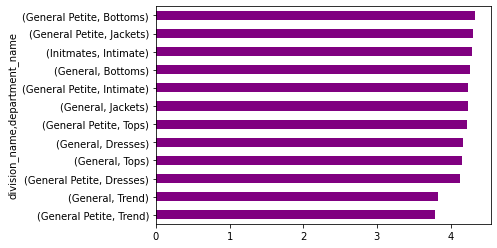

In [14]:
group_rating.plot(kind='barh', color='purple')

In [15]:
data.iloc[[5]].review_text.item()

'I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress.'

In [16]:
check1 = TextBlob(data.iloc[[5]].review_text.item())
check1.sentiment

Sentiment(polarity=0.17874999999999996, subjectivity=0.533125)

In [17]:
data.iloc[[250]].review_text.item()

"I love these pants. i have worn them a number of times already this season. i am 5' so i did have to have them hemmed. i lost the bottom button in the process but there are still 3 or 4 on the pants so i don't think they look odd. i also wear very high boots with these pants so that helps. a crisp white blouse and black leather jacket and i felt like a million bucks!"

In [18]:
check2 = TextBlob(data.iloc[[250]].review_text.item())
check2.sentiment

Sentiment(polarity=0.09716666666666669, subjectivity=0.4003333333333334)

In [19]:
data.iloc[[500]].review_text.item()

"I really like the style of this top, and it's delicate but well made, but i wish it were longer and less boxy. it's nice that it comes with a separate cami to layer, but the cami is very cropped. when i raise my arms you can see a lot of midriff (and the top is see through so a layer underneath is necessary). a longer cami probably wouldn't work because the top is also very short. i'm 5'0'' with an average torso length, and ordered the xxs petite. also, you would have to cut the tag off if you d"

In [20]:
check3 = TextBlob(data.iloc[[500]].review_text.item())
check3.sentiment

Sentiment(polarity=0.1712121212121212, subjectivity=0.5233333333333333)

In [21]:
sent = []
for sentence in check1.sentences:
    sent.append(sentence)
sent

[Sentence("I love tracy reese dresses, but this one is not for the very petite."),
 Sentence("i am just under 5 feet tall and usually wear a 0p in this brand."),
 Sentence("this dress was very pretty out of the package but its a lot of dress."),
 Sentence("the skirt is long and very full so it overwhelmed my small frame."),
 Sentence("not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment."),
 Sentence("i love the color and the idea of the style but it just did not work on me."),
 Sentence("i returned this dress.")]

In [22]:
sent

[Sentence("I love tracy reese dresses, but this one is not for the very petite."),
 Sentence("i am just under 5 feet tall and usually wear a 0p in this brand."),
 Sentence("this dress was very pretty out of the package but its a lot of dress."),
 Sentence("the skirt is long and very full so it overwhelmed my small frame."),
 Sentence("not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment."),
 Sentence("i love the color and the idea of the style but it just did not work on me."),
 Sentence("i returned this dress.")]

In [23]:
data = data[data['review_text'].notna()]

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23485
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            19675 non-null  object
 1   review_text      22641 non-null  object
 2   rating           22641 non-null  int64 
 3   division_name    22628 non-null  object
 4   department_name  22628 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.0+ MB


In [25]:
data['polarity'] = data['review_text'].apply(lambda x:TextBlob(str(x)).sentiment.polarity)

In [26]:
data

,title,review_text,rating,division_name,department_name,polarity
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate,0.633333
1,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses,0.339583
2,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses,0.073675
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms,0.550000
4,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops,0.512891
...,...,...,...,...,...,...
23481,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,General Petite,Dresses,0.552667
23482,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,General Petite,Tops,0.091667
23483,"Cute, but see through","This fit well, but the top was very see throug...",3,General Petite,Dresses,0.414286
23484,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,General,Dresses,0.322222


In [27]:
group_polarity = data.groupby(['division_name','department_name'])['polarity'].min().sort_values()

In [28]:
group_polarity

division_name   department_name
General         Tops              -0.975000
                Dresses           -0.916667
                Jackets           -0.750000
General Petite  Tops              -0.700000
                Intimate          -0.575000
                Jackets           -0.562500
General         Bottoms           -0.533333
General Petite  Dresses           -0.400000
Initmates       Intimate          -0.392333
General         Trend             -0.270833
General Petite  Bottoms           -0.257778
                Trend             -0.083333
Name: polarity, dtype: float64

<AxesSubplot:ylabel='division_name,department_name'>

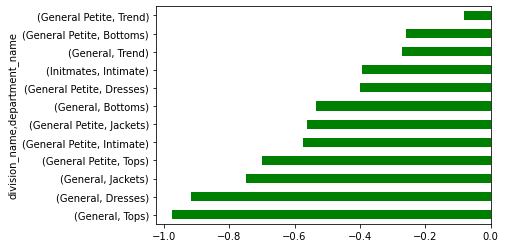

In [29]:
group_polarity.plot(kind='barh', color='green')

In [30]:
group_polarity_mean = data.groupby(['division_name','department_name'])['polarity'].mean()

<AxesSubplot:ylabel='division_name,department_name'>

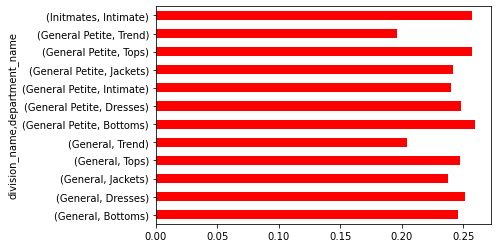

In [31]:
group_polarity_mean.plot(kind='barh', color='red')